In [ ]:
# https://www.kaggle.com/competitions/playground-series-s3e23/data


import pandas as pd 
import numpy as np  
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
data = pd.read_csv('data/train.csv', index_col=[0])

def Overview (data) :
    profile = ProfileReport(dark_mode=True, df=data)
    profile.to_file("output.html")

# Overview(data)

In [ ]:
# Data Analysis 

# As data is to much long so we use sample of data to analyze

# Creating Sample 

sample_data = data.sample(10000)
sample_data

In [ ]:
# Making the Univarient Data analysis

def UnivariateAnalysis(data, column):
    plt.figure(figsize=(12, 6))  

    plt.subplot(121)
    sns.histplot(data=data, x=column)
    plt.title(f'Countplot of {column}')

    plt.subplot(122)
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column}')

    plt.tight_layout() 
    plt.show()

In [ ]:
UnivariateAnalysis(sample_data, 'defects')

In [ ]:
corr_df = sample_data.corr()['defects'].sort_values(ascending=False).drop(['defects'])
corr_df = pd.concat([corr_df.head(10), corr_df.tail(1)])
corr_df.index

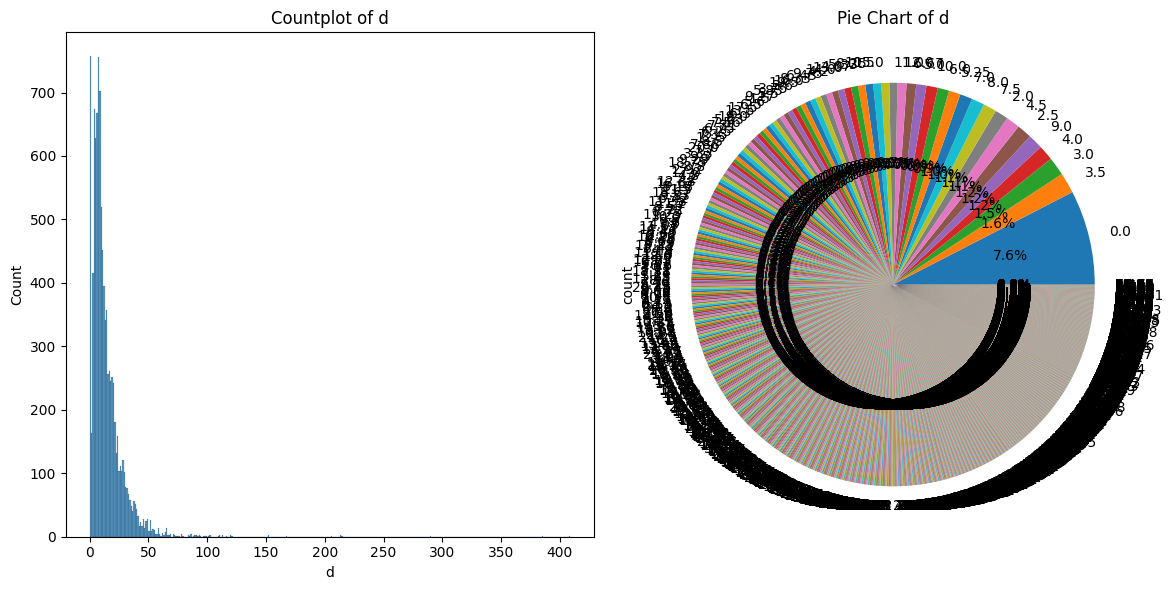

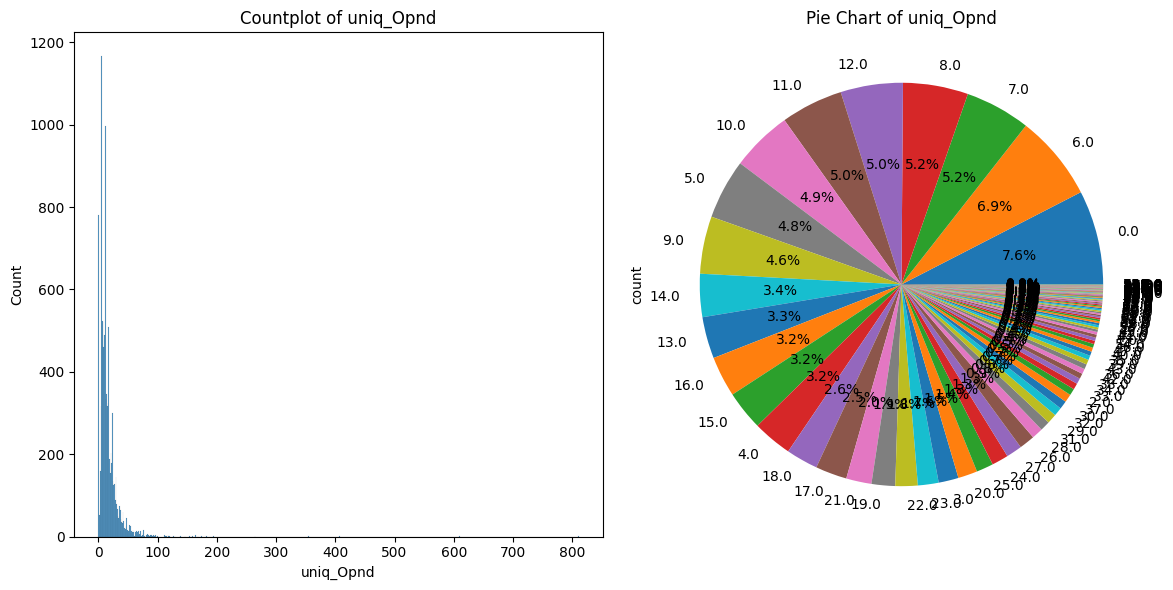

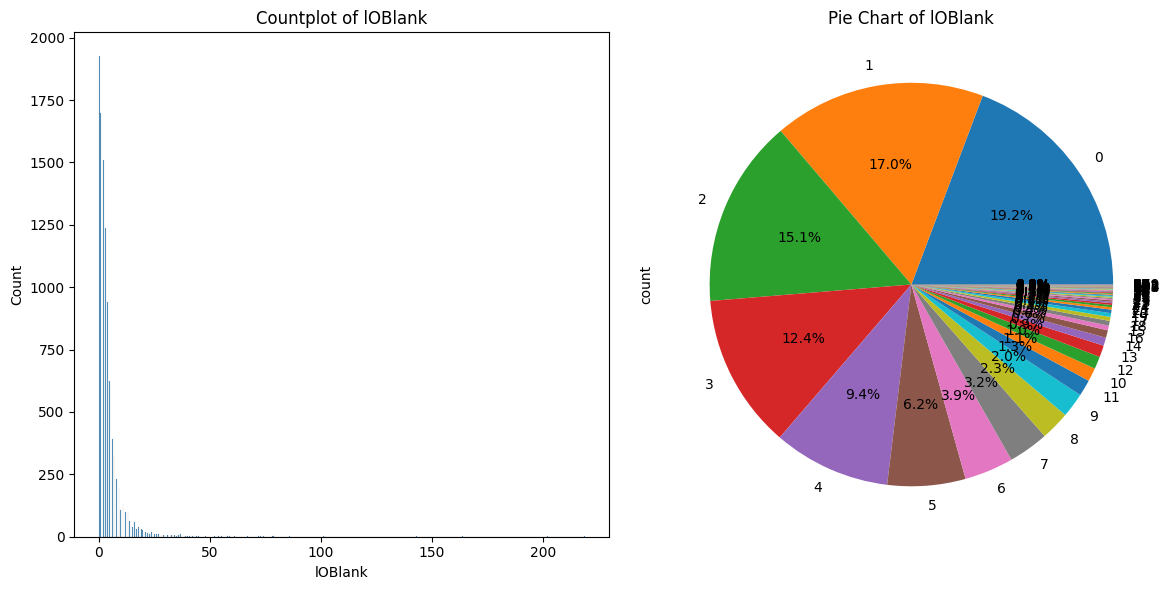

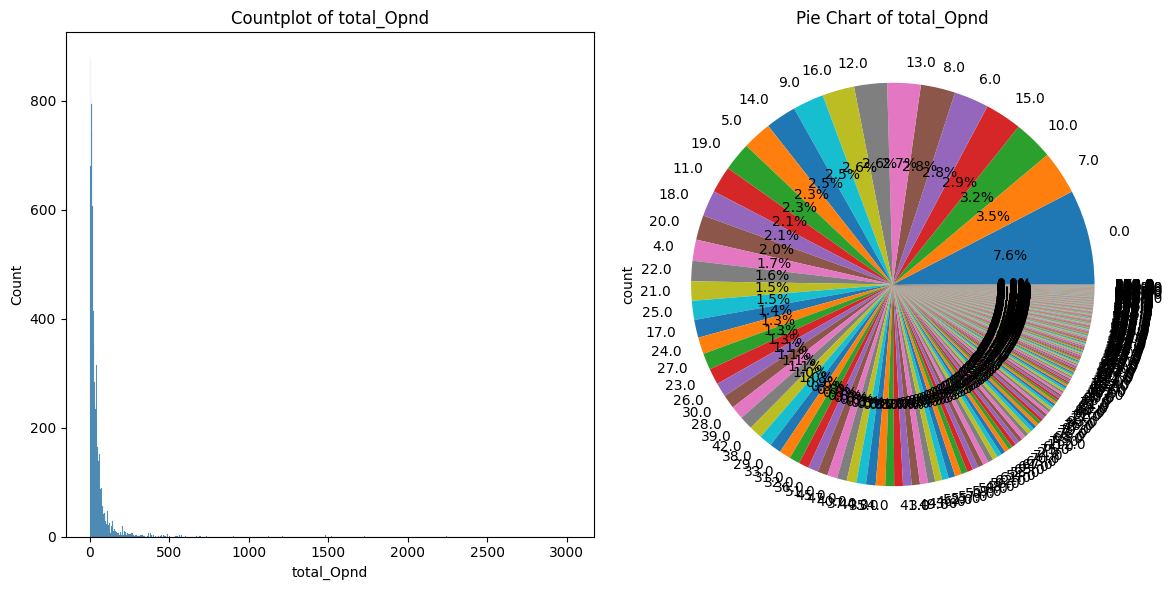

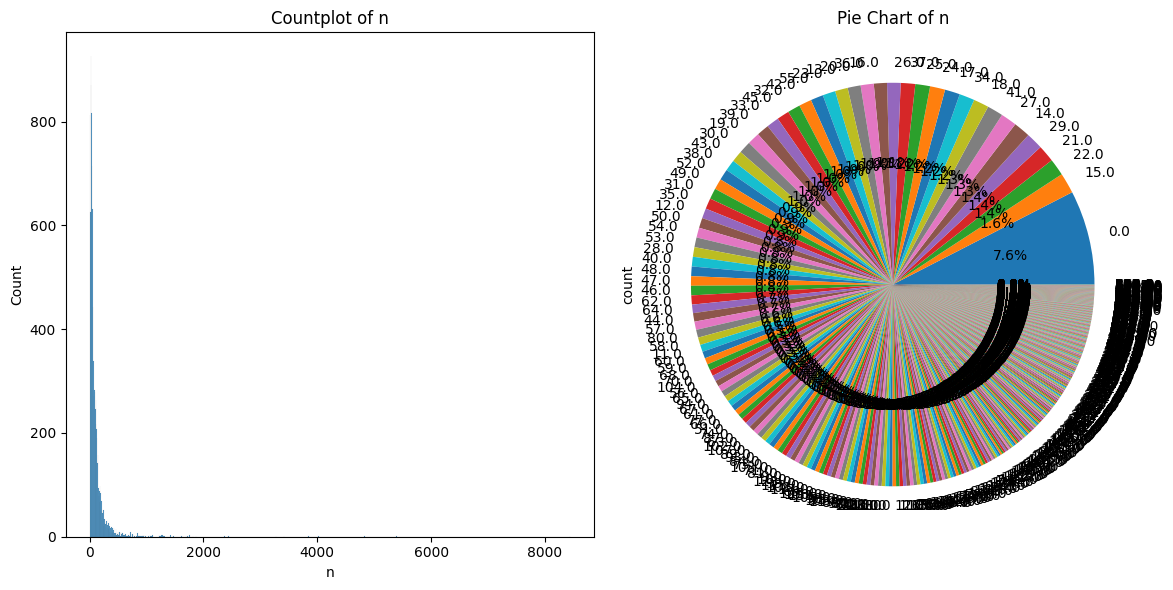

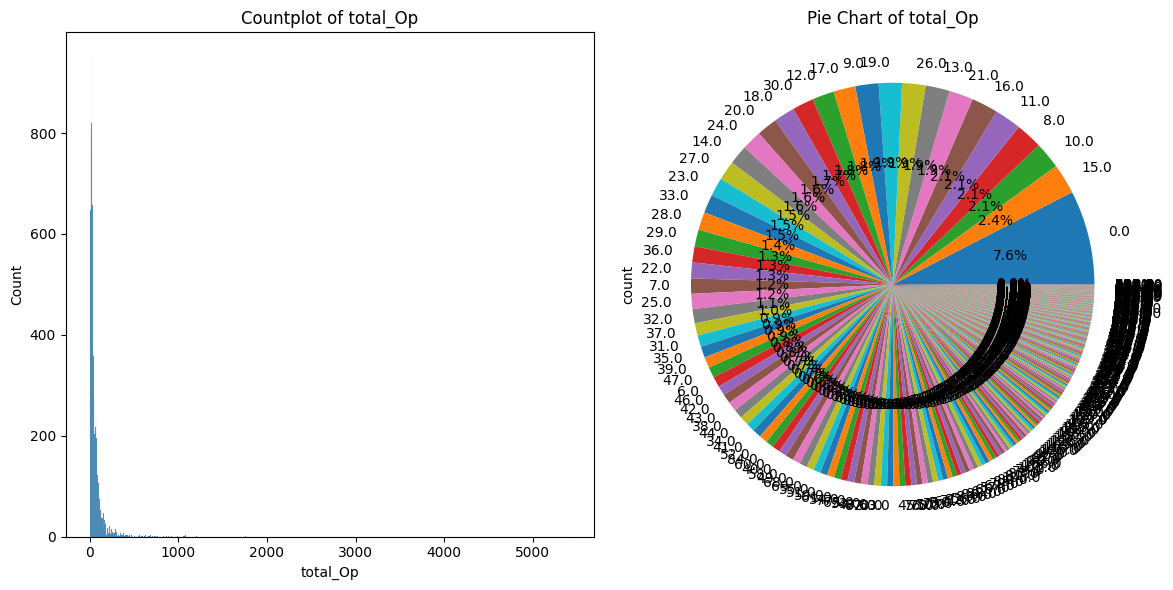

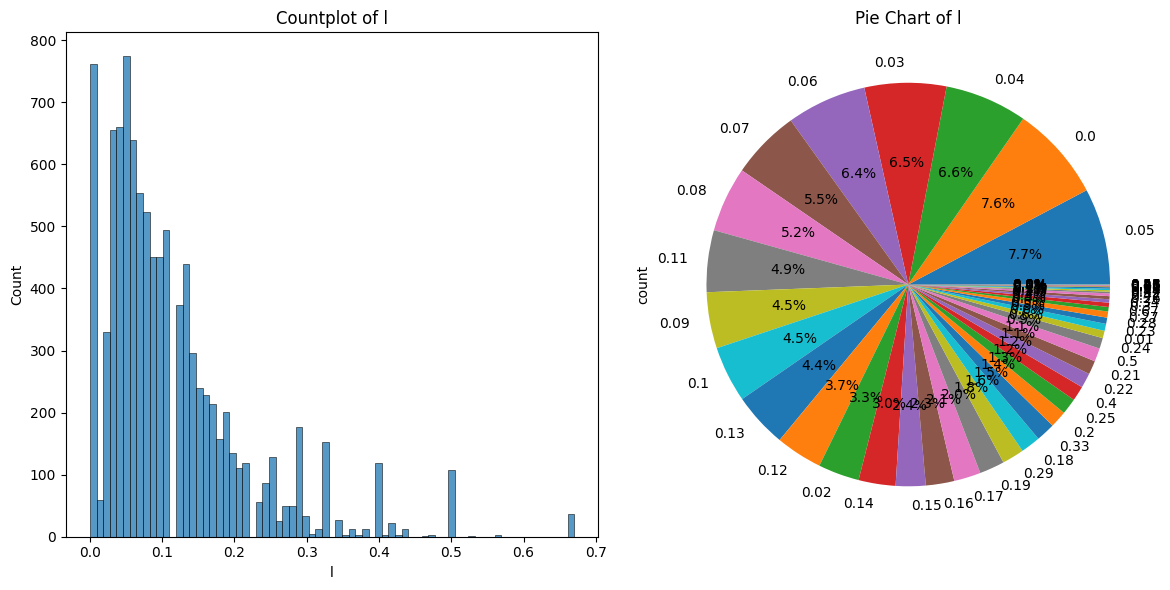

In [7]:
for column in corr_df.index :
    UnivariateAnalysis(sample_data, column)

In [8]:
#  This show the very much skewness in data to check actual skewness we stats.probplot

from scipy import stats
def CheckSkewness(data, column):
    plt.figure(figsize=(12, 6)) 

    plt.subplot(121)
    sns.kdeplot(data[column]) 
    plt.title("Density Plot on " + column) 


    plt.subplot(122)
    stats.probplot(data[column], dist='norm', plot=plt)
    plt.title(f"Q-Q Plot of {column}")

    
    plt.tight_layout()
    plt.show()

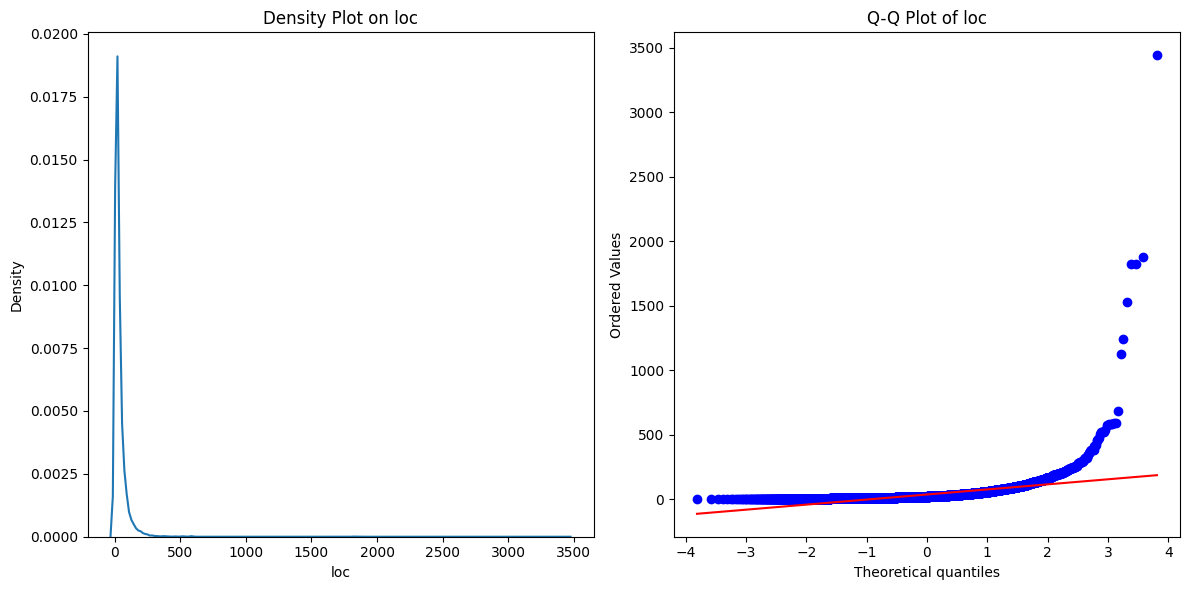

In [9]:
CheckSkewness(sample_data, 'loc')

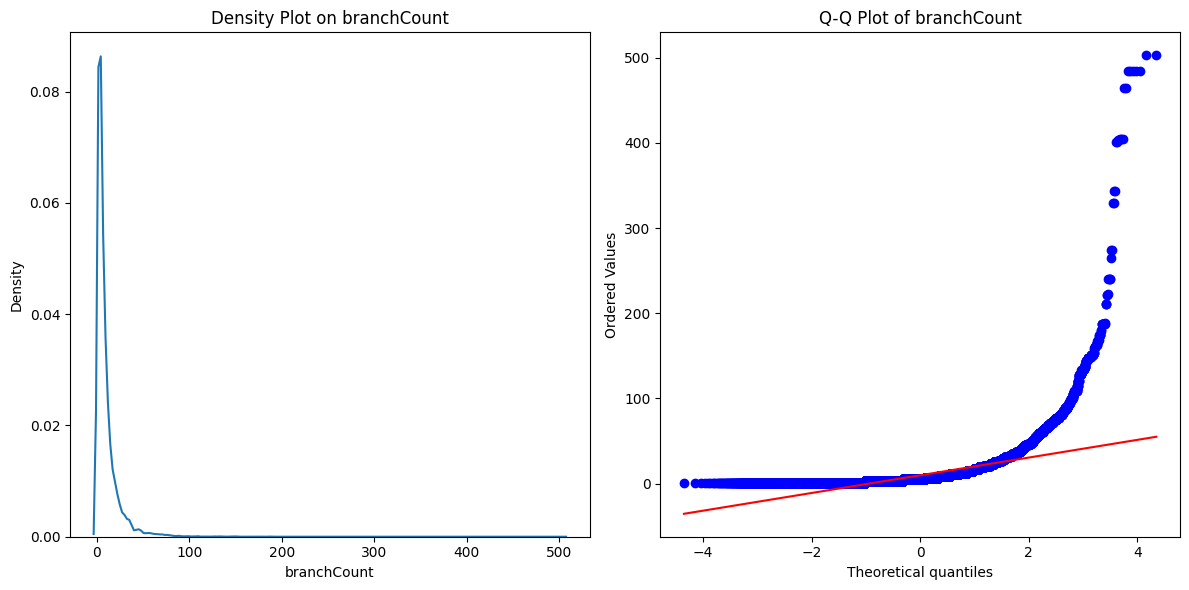

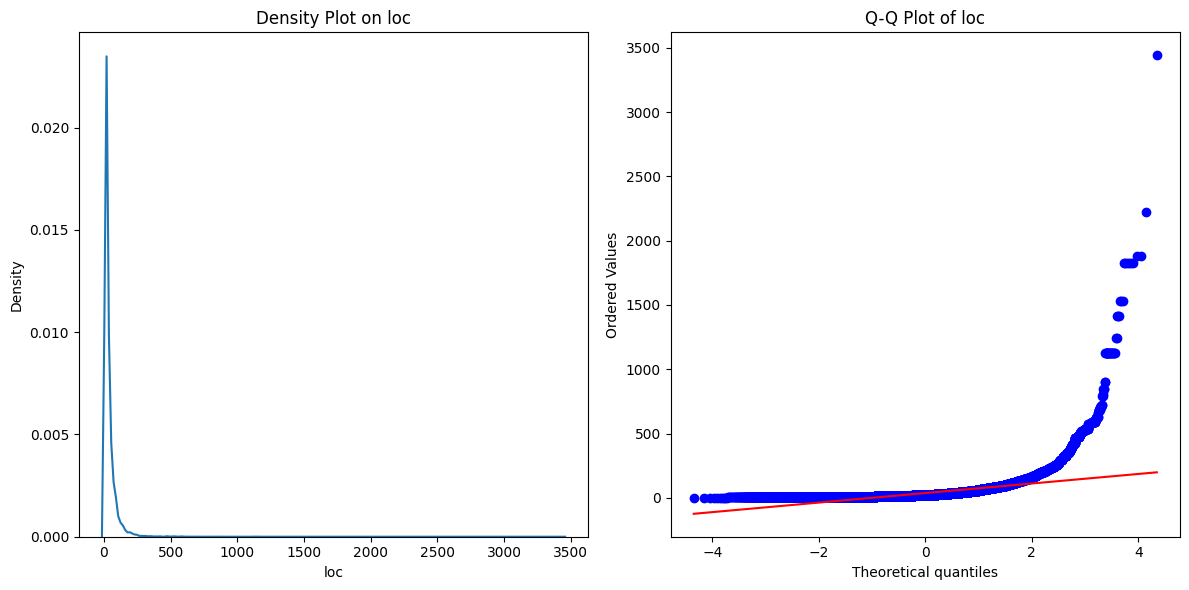

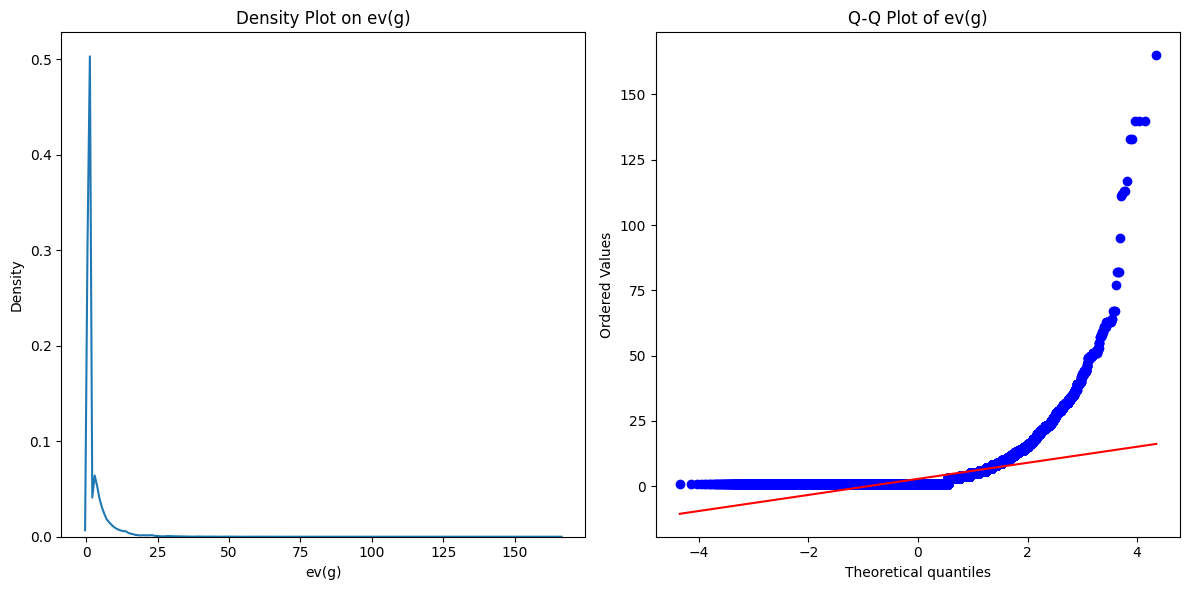

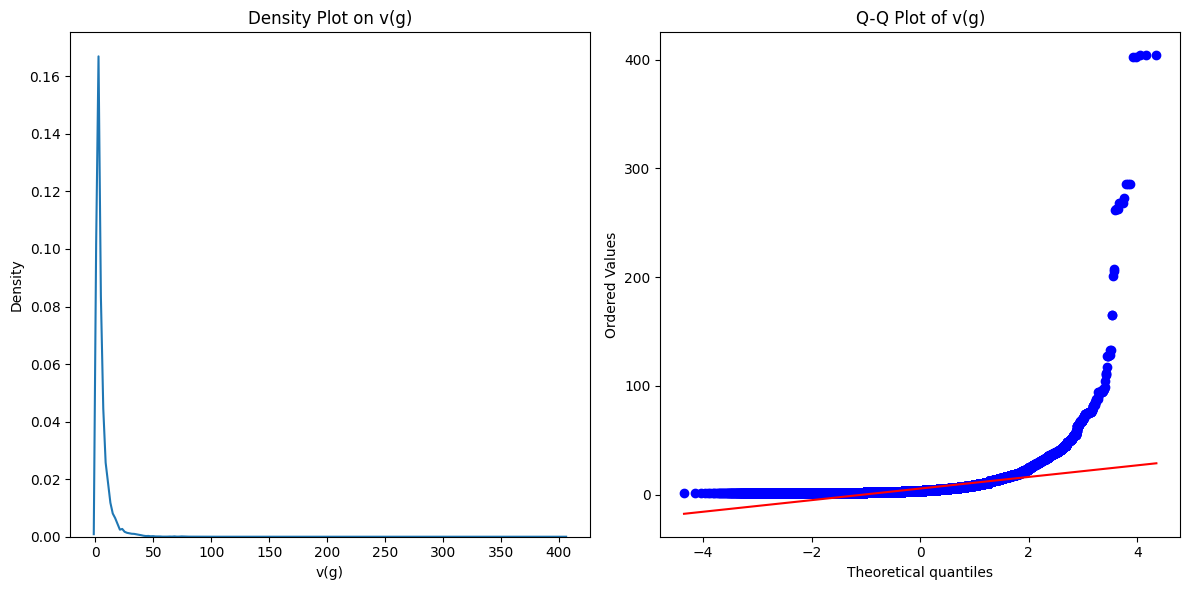

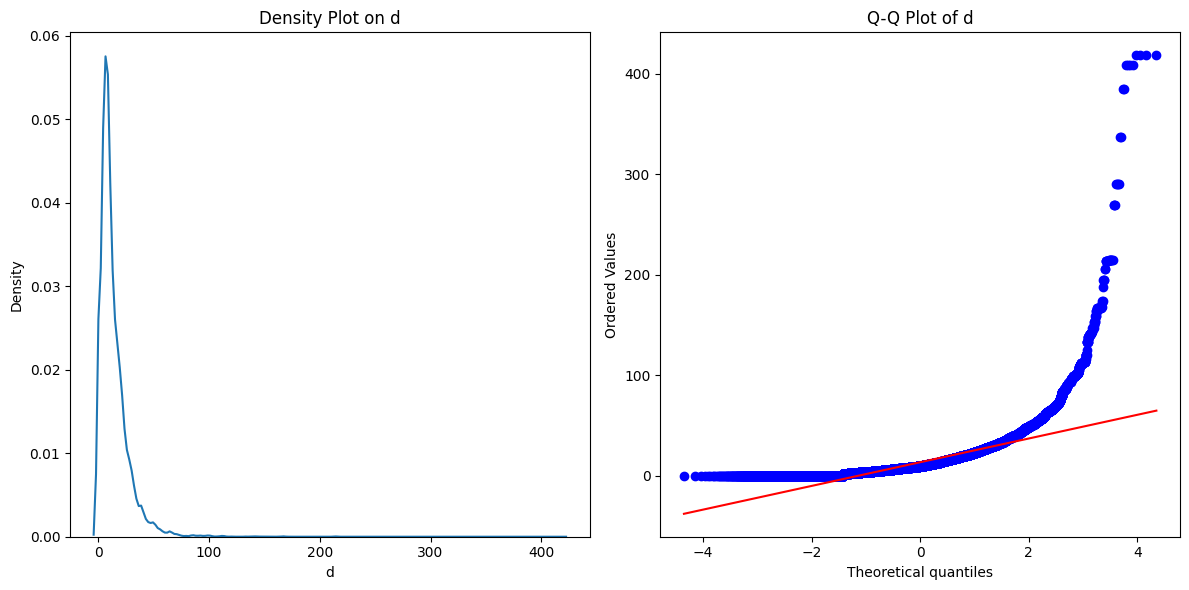

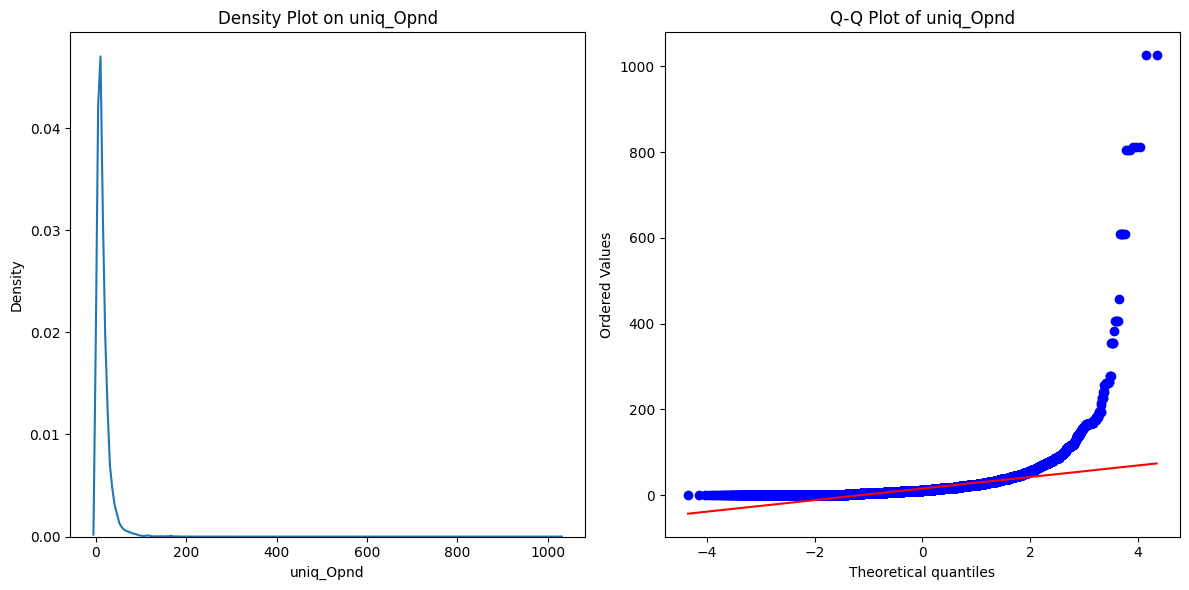

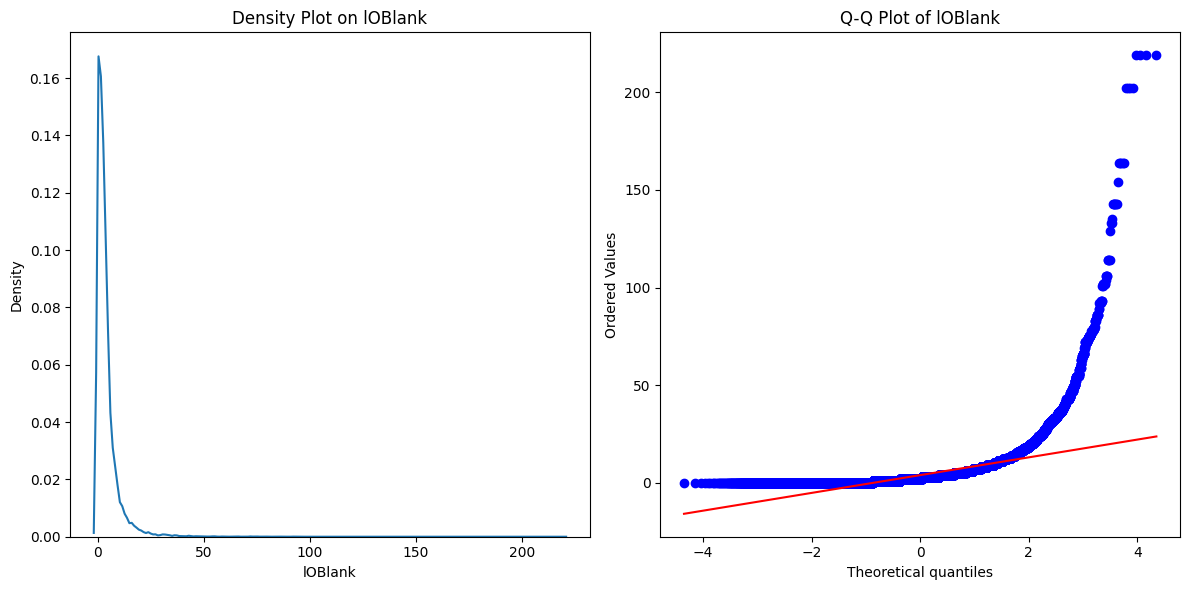

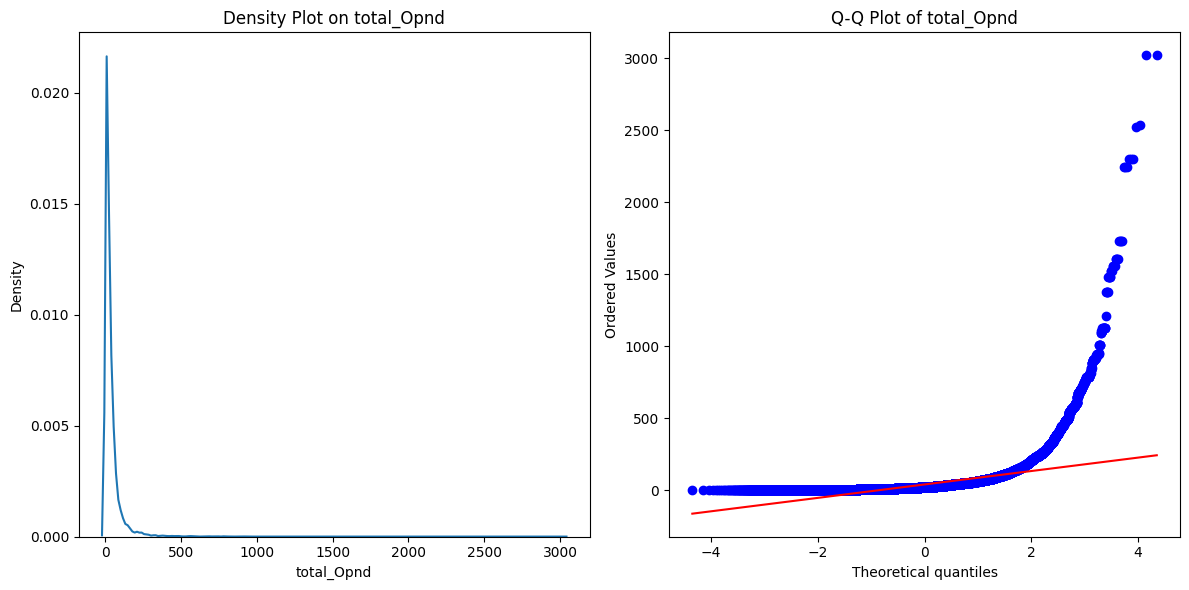

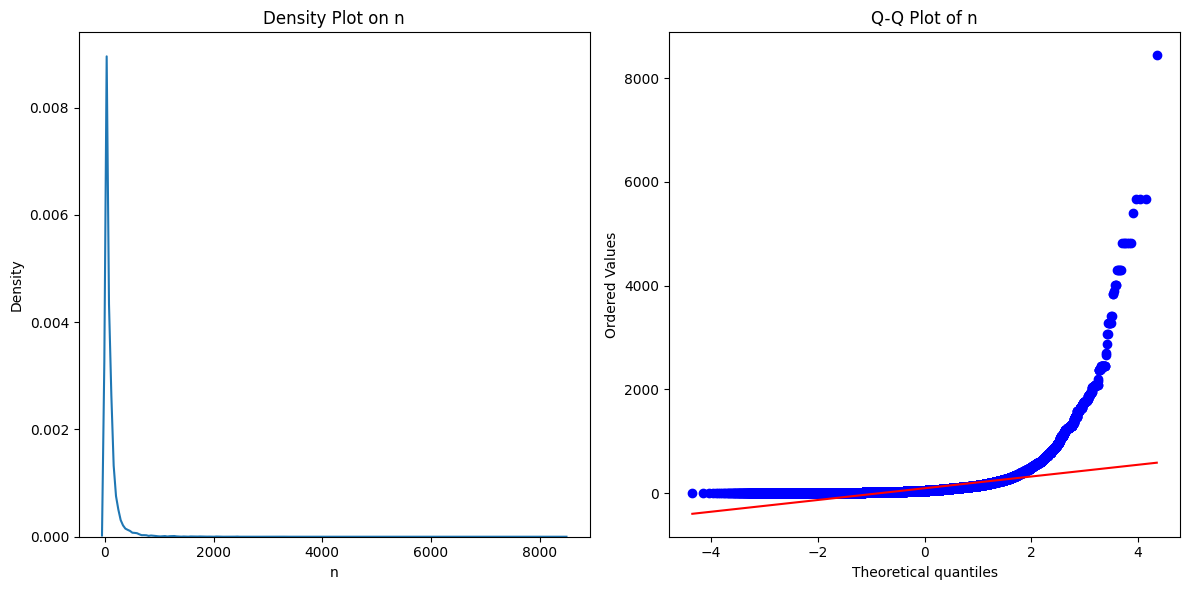

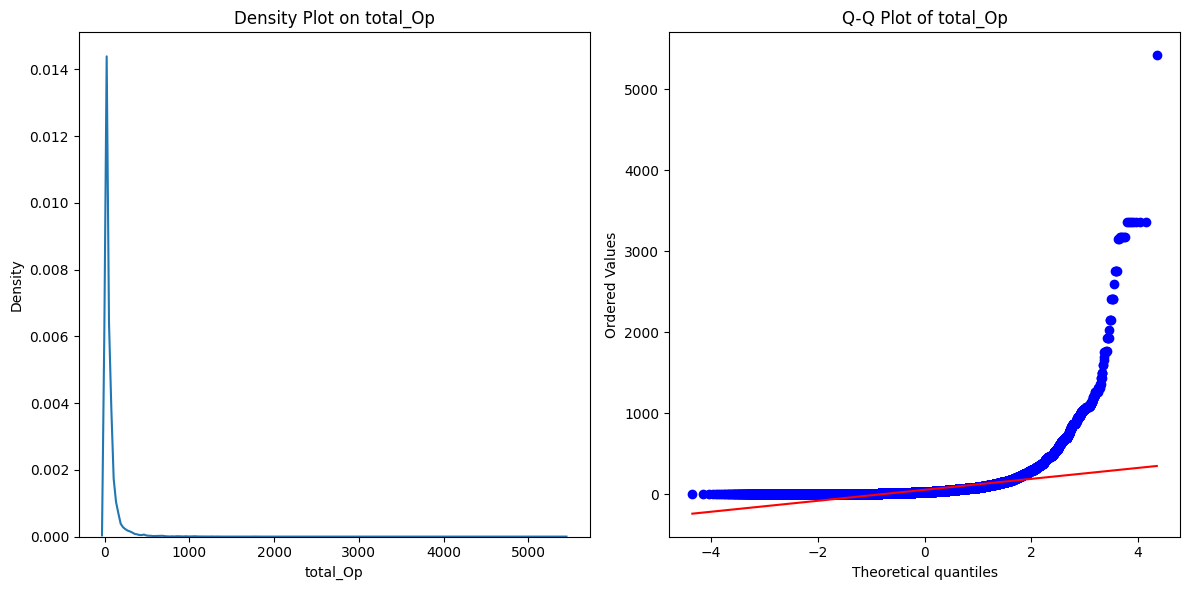

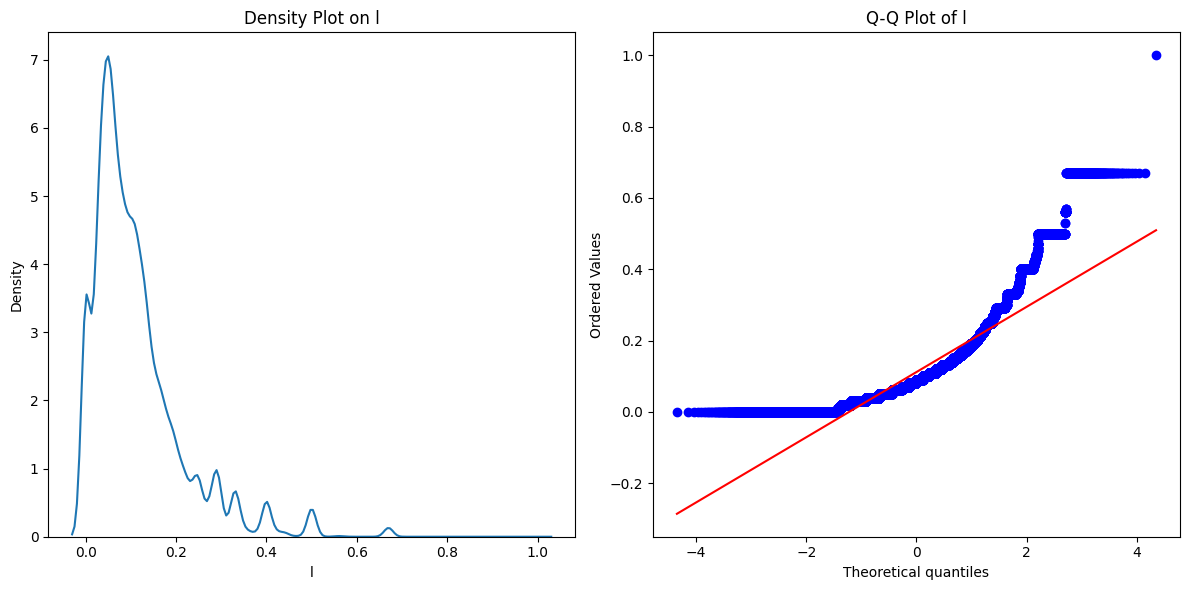

In [10]:
for column in corr_df.index :
    CheckSkewness(data, column)

In [11]:
# These all are skew so we should go to the bining technique
for column in data.columns :
    print(column)
    print(data[column].value_counts().sort_values(ascending=False))

loc
loc
11.0     3657
12.0     3431
7.0      3426
17.0     3255
8.0      3109
         ... 
275.0       1
518.0       1
582.0       1
622.0       1
230.0       1
Name: count, Length: 378, dtype: int64
v(g)
v(g)
2.0      22519
1.0      15794
3.0      15555
4.0      10002
5.0       7864
         ...  
83.0         1
117.0        1
201.0        1
99.0         1
104.0        1
Name: count, Length: 106, dtype: int64
ev(g)
ev(g)
1.0      72275
3.0       7143
4.0       5032
5.0       3732
6.0       2723
         ...  
95.0         1
111.0        1
165.0        1
47.0         1
117.0        1
Name: count, Length: 71, dtype: int64
iv(g)
iv(g)
2.0      30315
1.0      27101
3.0      14879
4.0       8630
5.0       5697
         ...  
75.0         1
54.0         1
43.0         1
69.0         1
207.0        1
Name: count, Length: 84, dtype: int64
n
n
0.0       7835
15.0      1430
22.0      1390
27.0      1383
29.0      1311
          ... 
470.0        1
866.0        1
8441.0       1
1277.0       1
7

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [13]:
inputs = data.drop(['defects'], axis=1)
targets = data.defects

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
targets = le.fit_transform(targets)

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [14]:
data.isna().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [15]:
data.describe()

loc           v(g)          ev(g)          iv(g)   
count  101763.000000  101763.000000  101763.000000  101763.000000  \
mean       37.347160       5.492684       2.845022       3.498826   
std        54.600401       7.900855       4.631262       5.534541   
min         1.000000       1.000000       1.000000       1.000000   
25%        13.000000       2.000000       1.000000       1.000000   
50%        22.000000       3.000000       1.000000       2.000000   
75%        42.000000       6.000000       3.000000       4.000000   
max      3442.000000     404.000000     165.000000     402.000000   

                   n              v              l              d   
count  101763.000000  101763.000000  101763.000000  101763.000000  \
mean       96.655995     538.280956       0.111634      13.681881   
std       171.147191    1270.791601       0.100096      14.121306   
min         0.000000       0.000000       0.000000       0.000000   
25%        25.000000      97.670000       0.050000       5.600000   
50%        51.000000     232.790000       0.090000       9.820000   
75%       111.000000     560.250000       0.150000      18.000000   
max      8441.000000   80843.080000       1.000000     418.200000   

                   i             e  ...              t         lOCode   
count  101763.000000  1.017630e+05  ...  101763.000000  101763.000000  \
mean       27.573007  2.085359e+04  ...    1141.357982      22.802453   
std        22.856742  1.905714e+05  ...    9862.795472      38.541010   
min         0.000000  0.000000e+00  ...       0.000000       0.000000   
25%        15.560000  5.647300e+02  ...      31.380000       7.000000   
50%        23.360000  2.256230e+03  ...     125.400000      14.000000   
75%        34.340000  1.019324e+04  ...     565.920000      26.000000   
max       569.780000  1.684662e+07  ...  935923.390000    2824.000000   

           lOComment        lOBlank  locCodeAndComment        uniq_Op   
count  101763.000000  101763.000000      101763.000000  101763.000000  \
mean        1.773945       3.979865           0.196604      11.896131   
std         5.902412       6.382358           0.998906       6.749549   
min         0.000000       0.000000           0.000000       0.000000   
25%         0.000000       1.000000           0.000000       8.000000   
50%         0.000000       2.000000           0.000000      11.000000   
75%         1.000000       5.000000           0.000000      16.000000   
max       344.000000     219.000000          43.000000     410.000000   

           uniq_Opnd       total_Op     total_Opnd    branchCount  
count  101763.000000  101763.000000  101763.000000  101763.000000  
mean       15.596671      57.628116      39.249698       9.839549  
std        18.064261     104.537660      71.692309      14.412769  
min         0.000000       0.000000       0.000000       1.000000  
25%         7.000000      15.000000      10.000000       3.000000  
50%        12.000000      30.000000      20.000000       5.000000  
75%        20.000000      66.000000      45.000000      11.000000  
max      1026.000000    5420.000000    3021.000000     503.000000  

[8 rows x 21 columns]

In [16]:
from sklearn.preprocessing import PowerTransformer, FunctionTransformer

In [17]:
trf1 = ColumnTransformer([
    ("power", PowerTransformer(), ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't','lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'])
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

In [18]:

trf2 = ColumnTransformer([
    ("function", FunctionTransformer(func=np.log1p), ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't','lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'])
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

X_train = trf2.fit_transform(X_train)
X_train
X_test = trf2.transform(X_test)


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


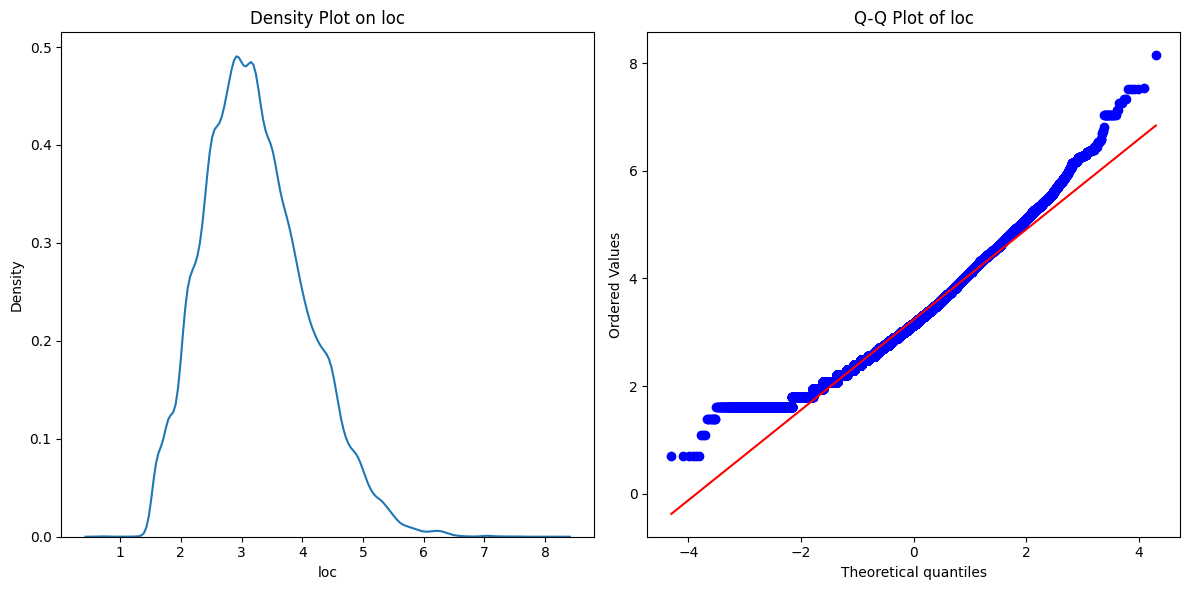

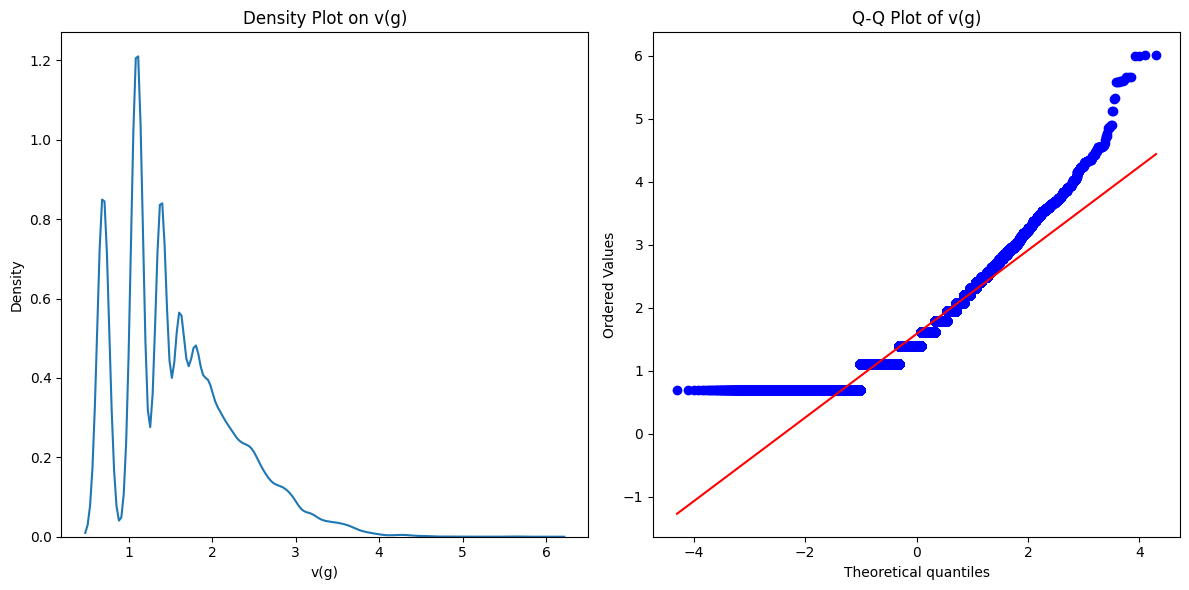

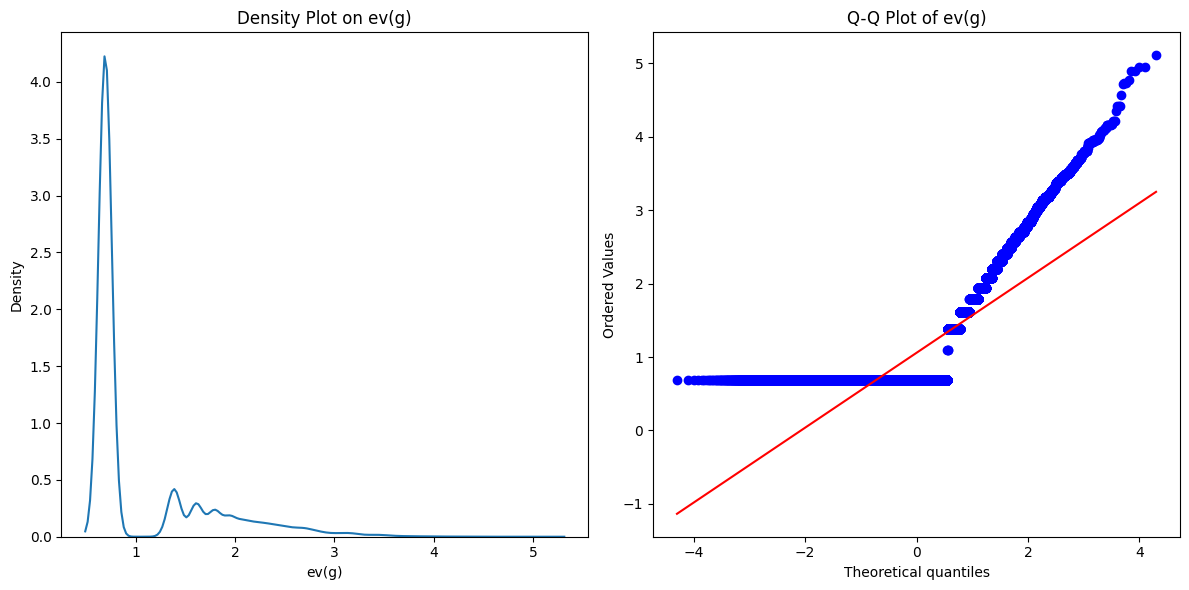

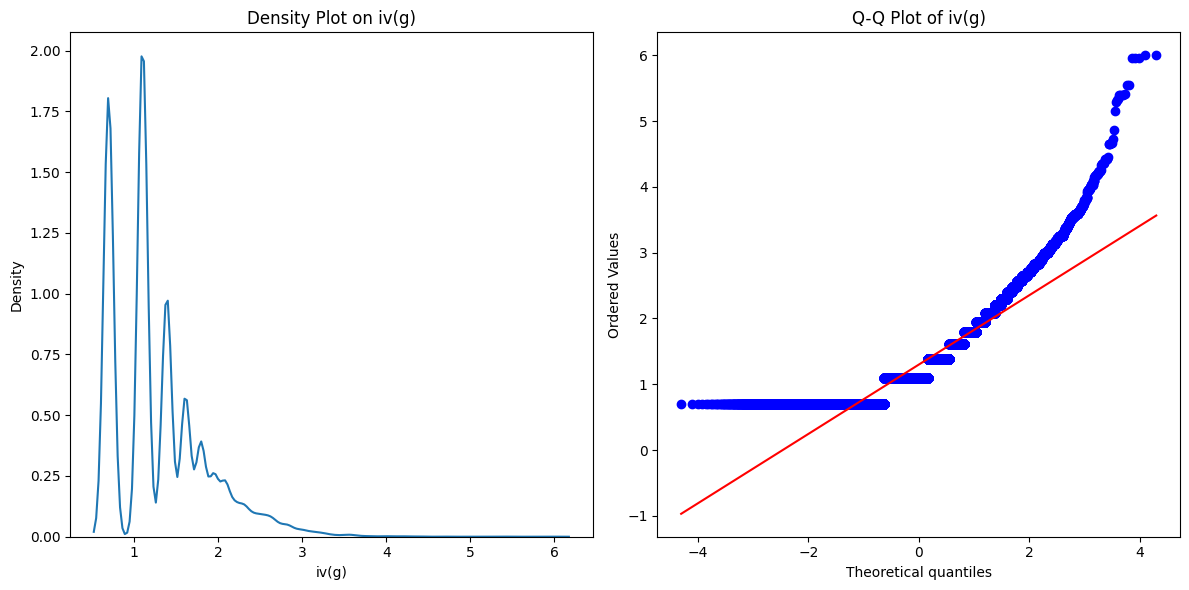

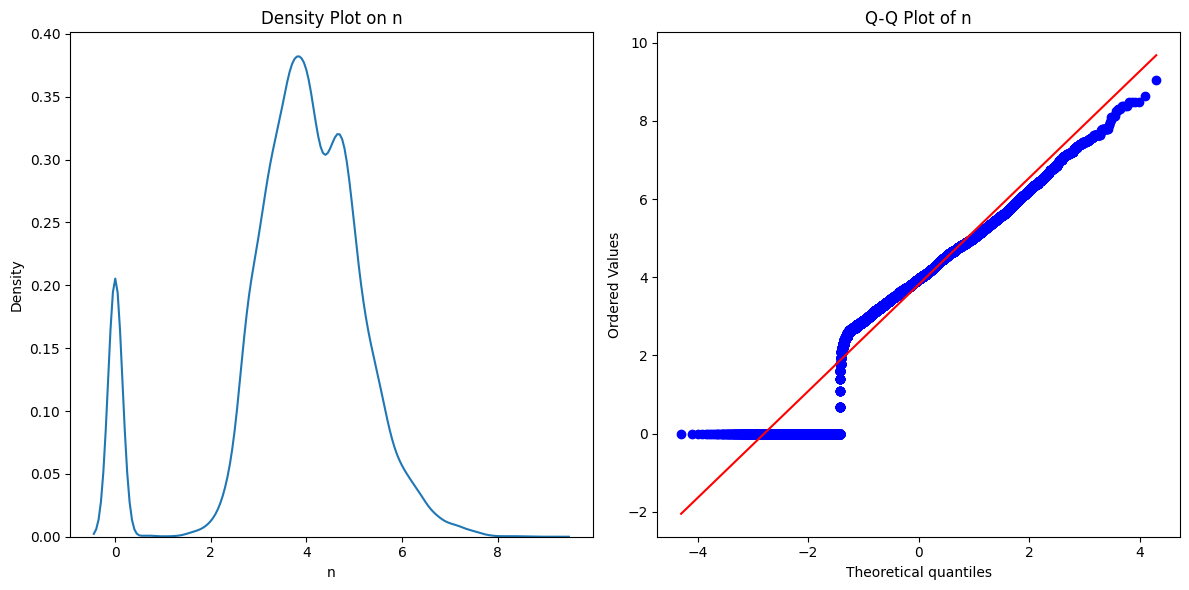

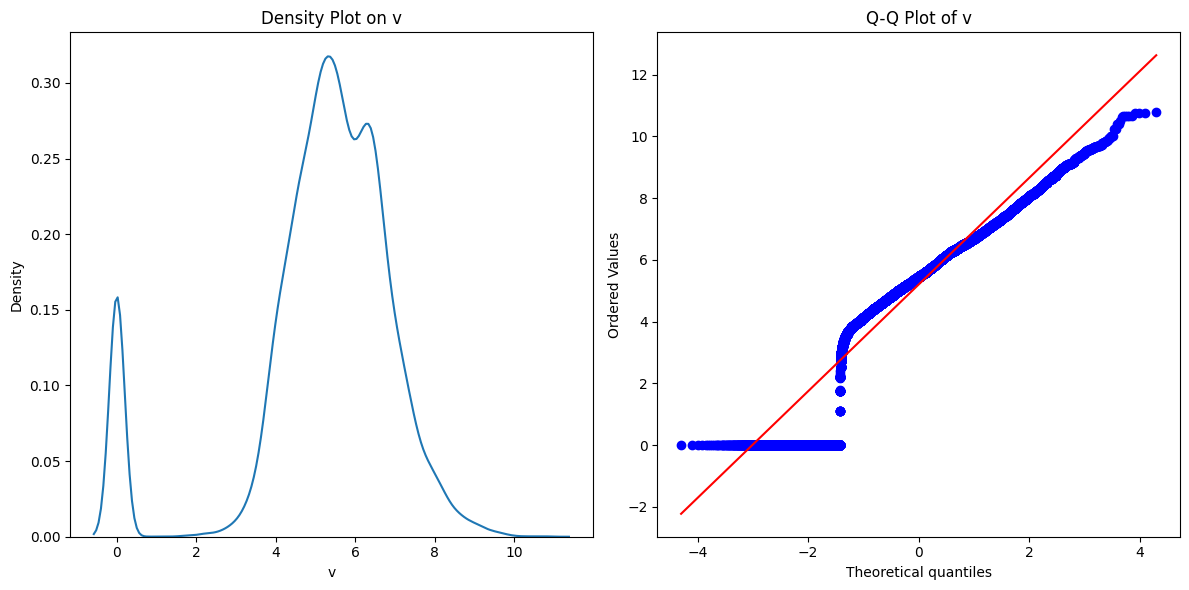

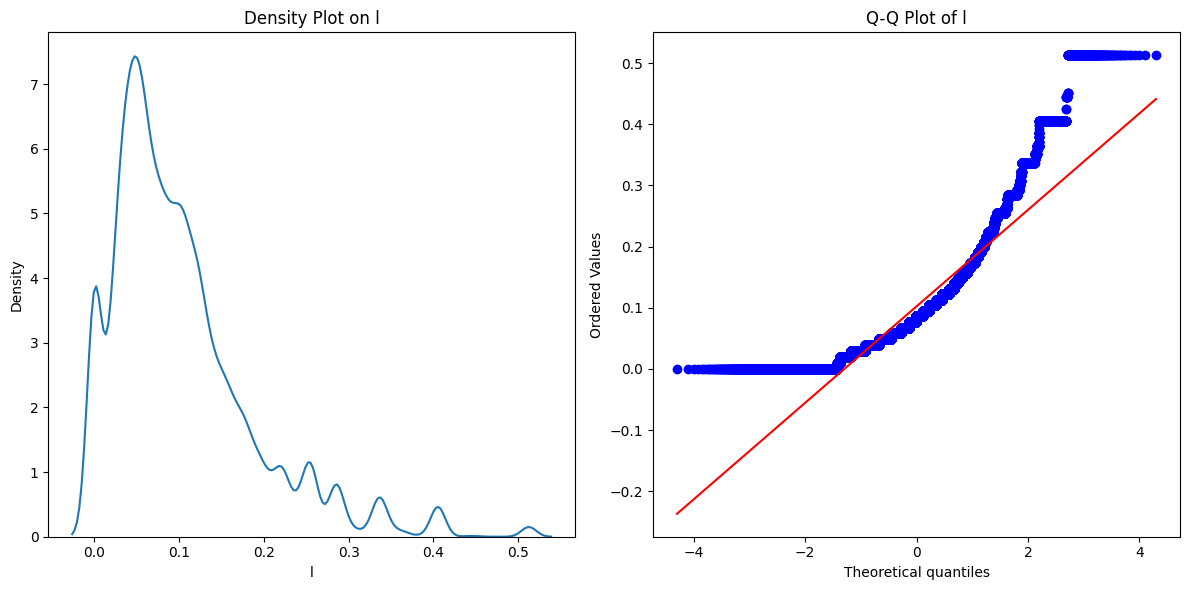

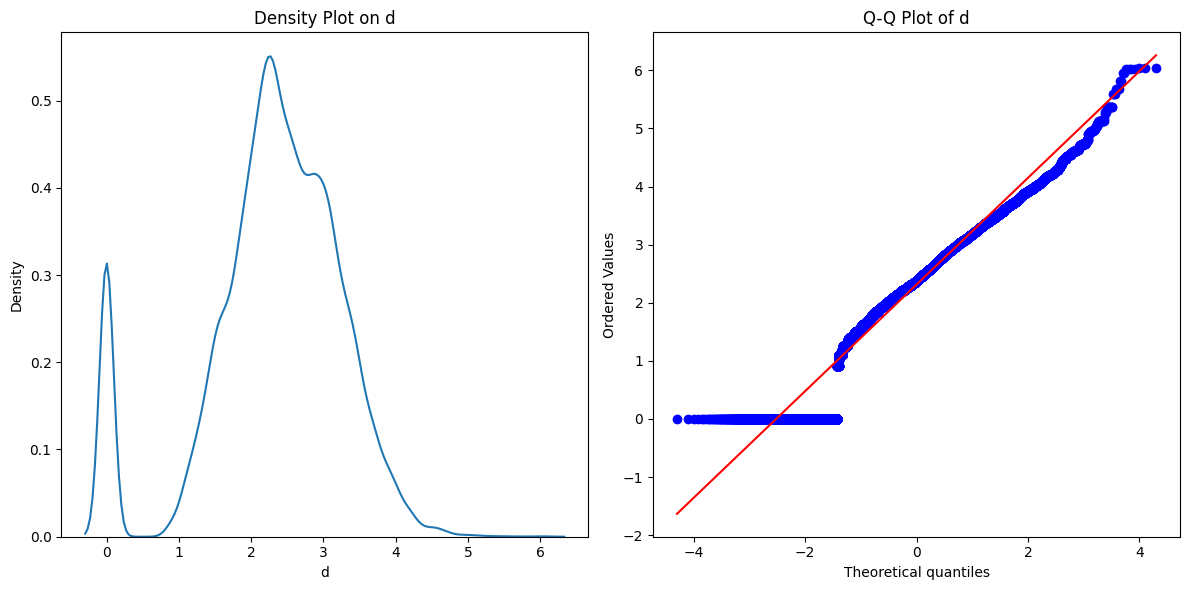

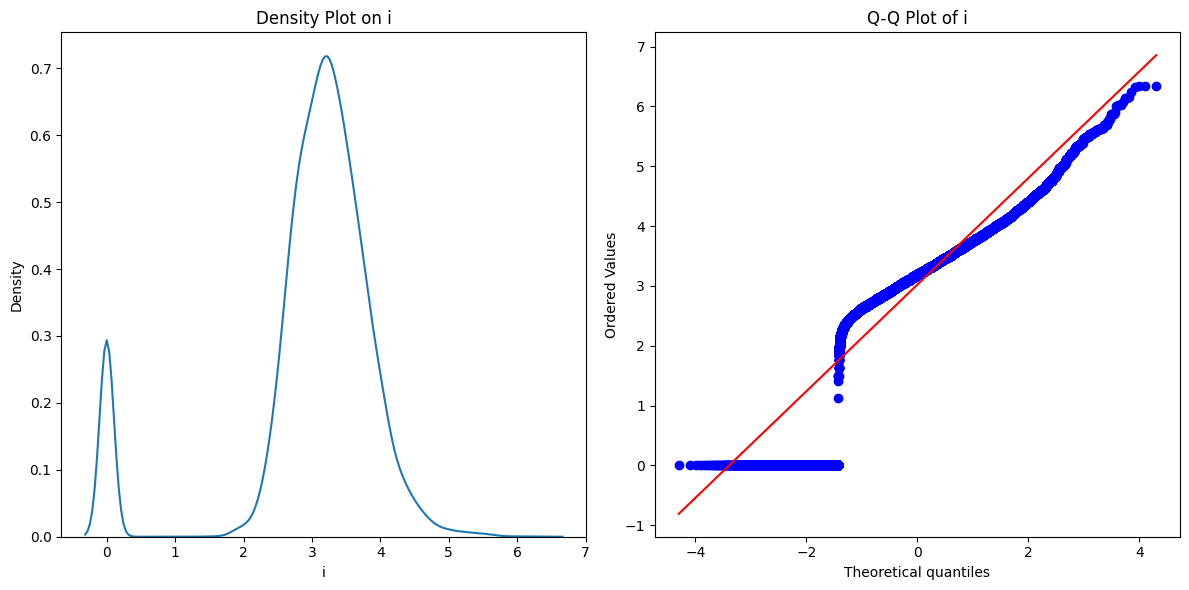

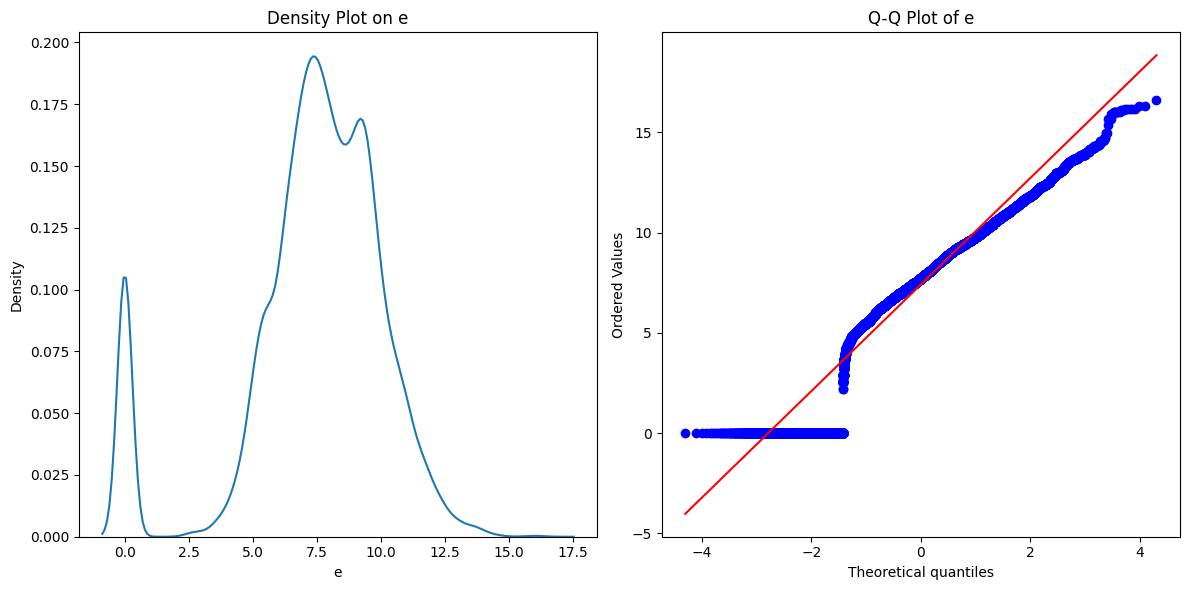

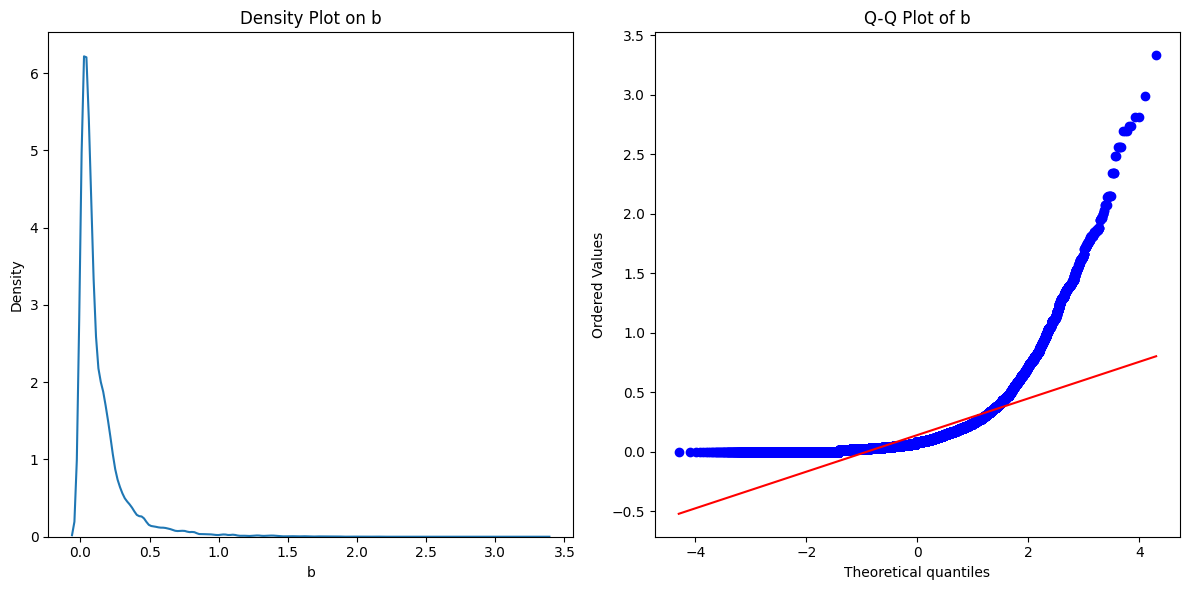

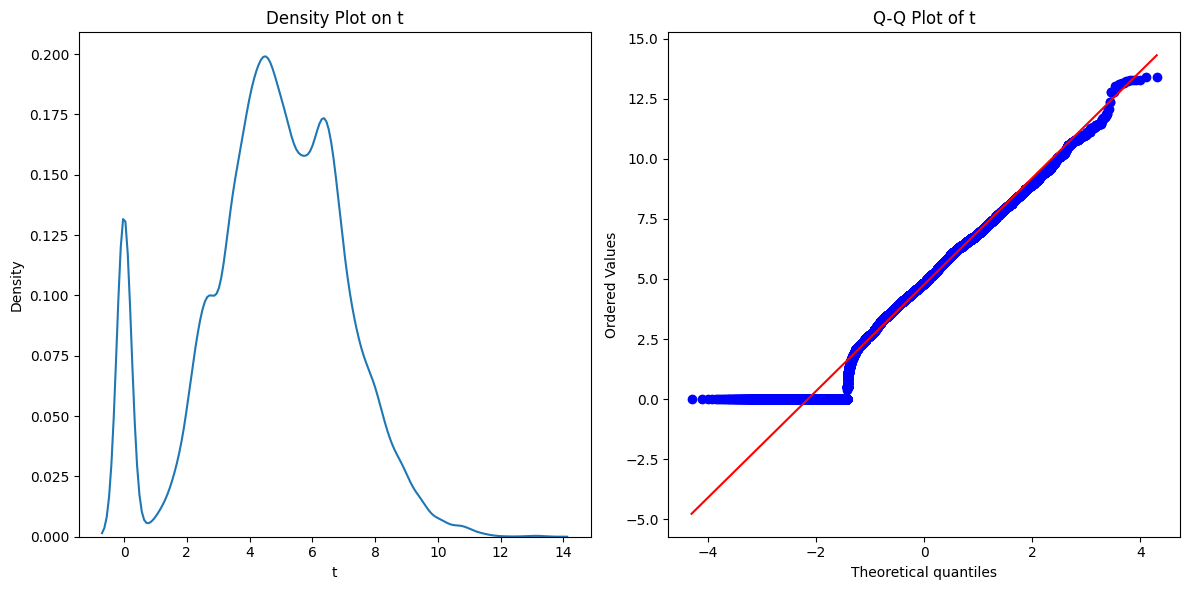

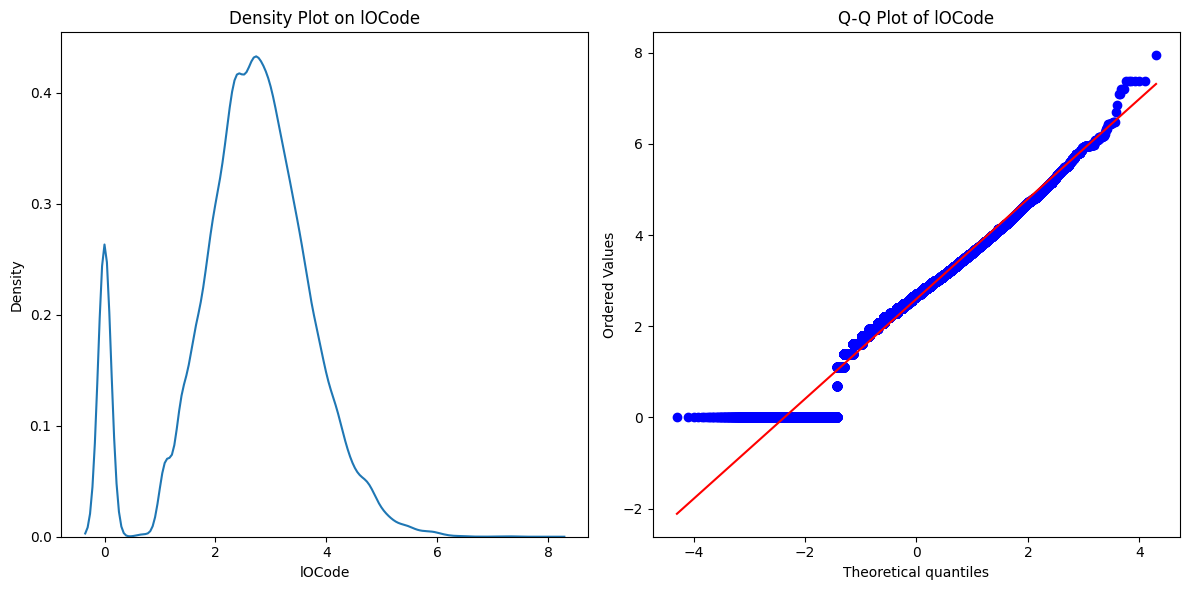

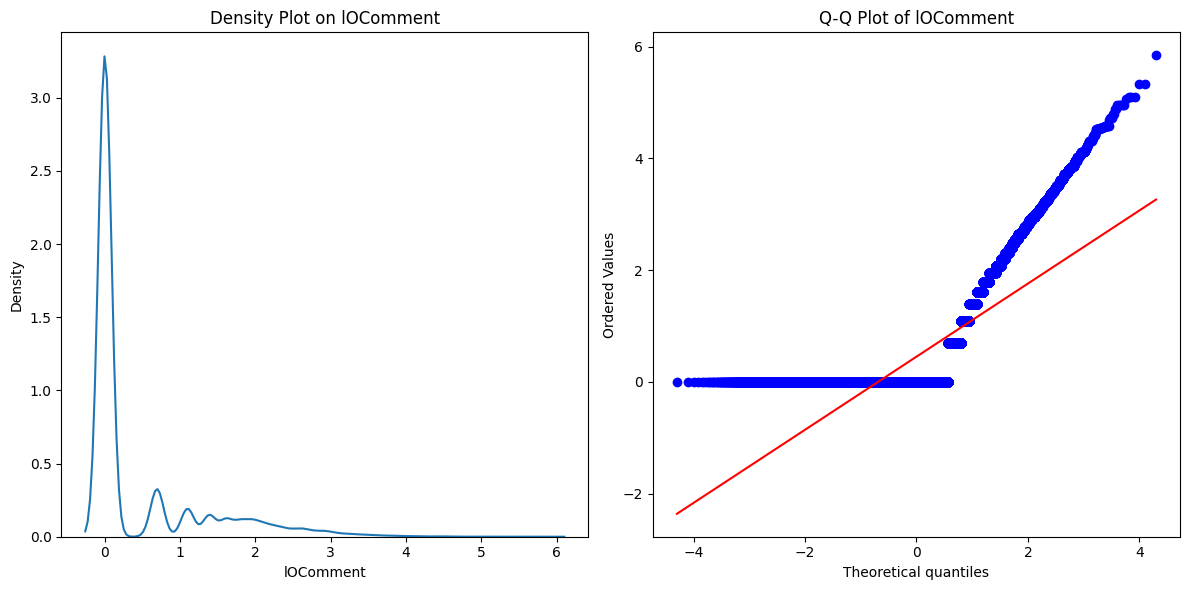

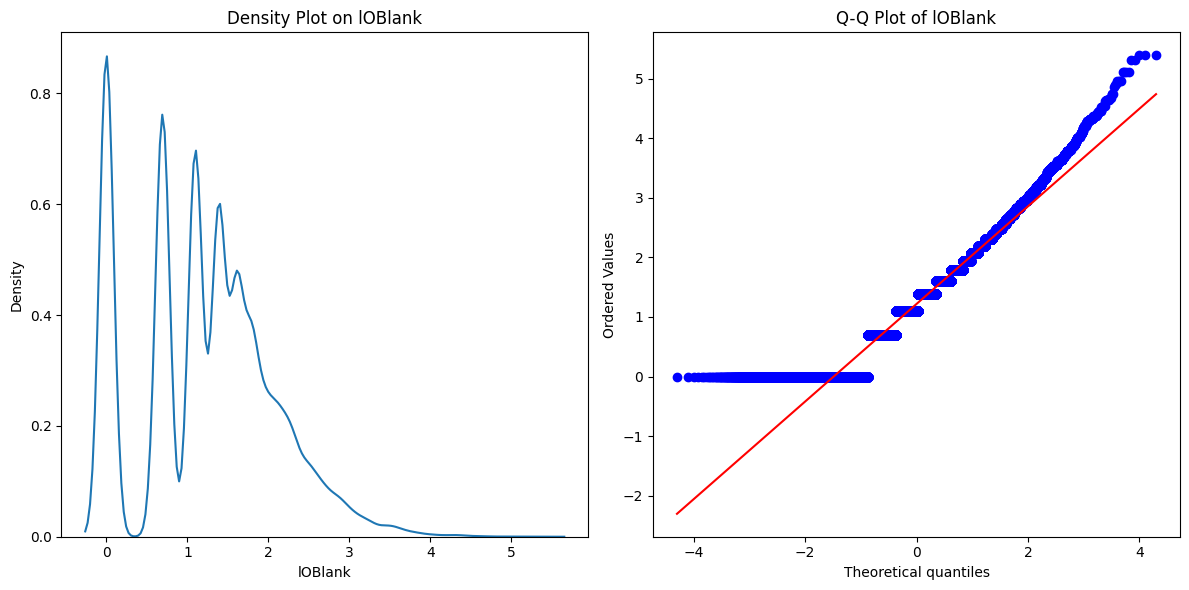

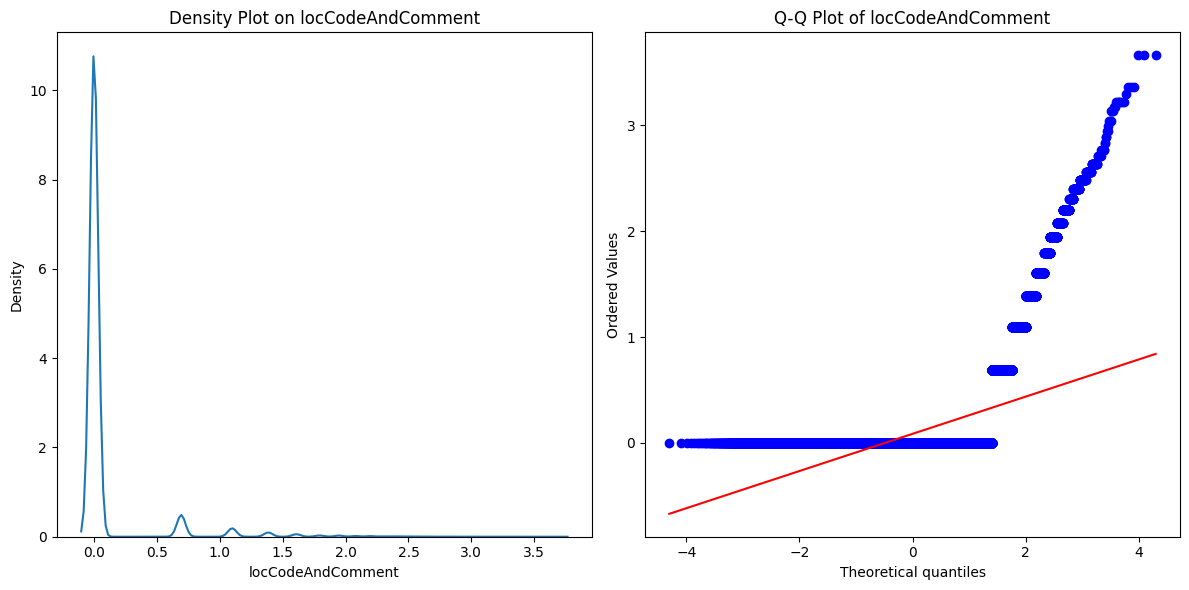

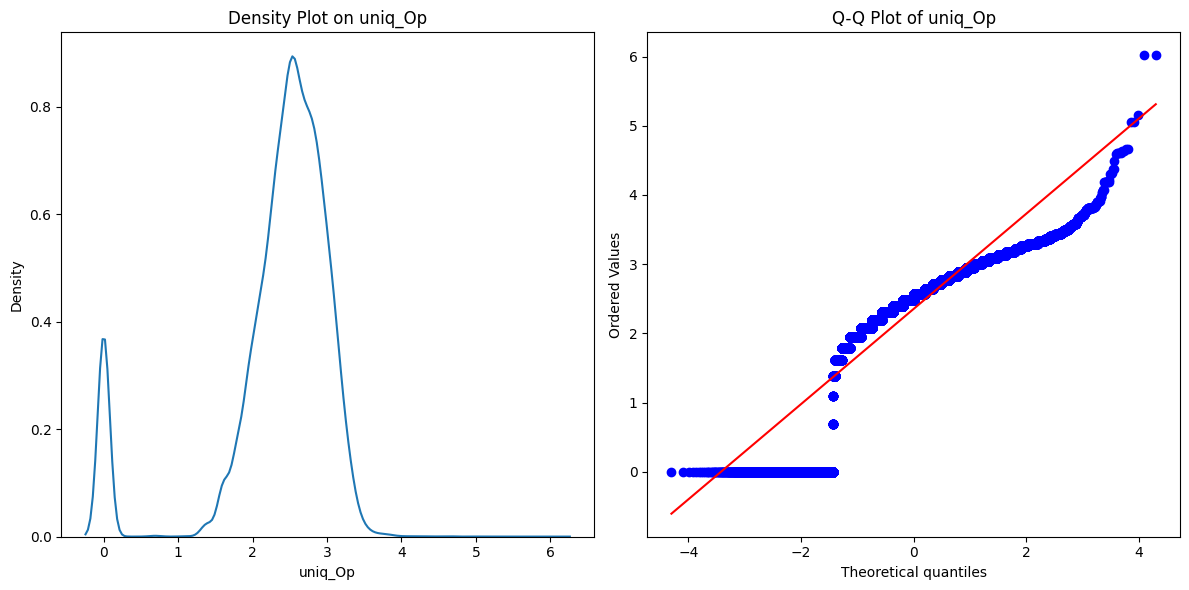

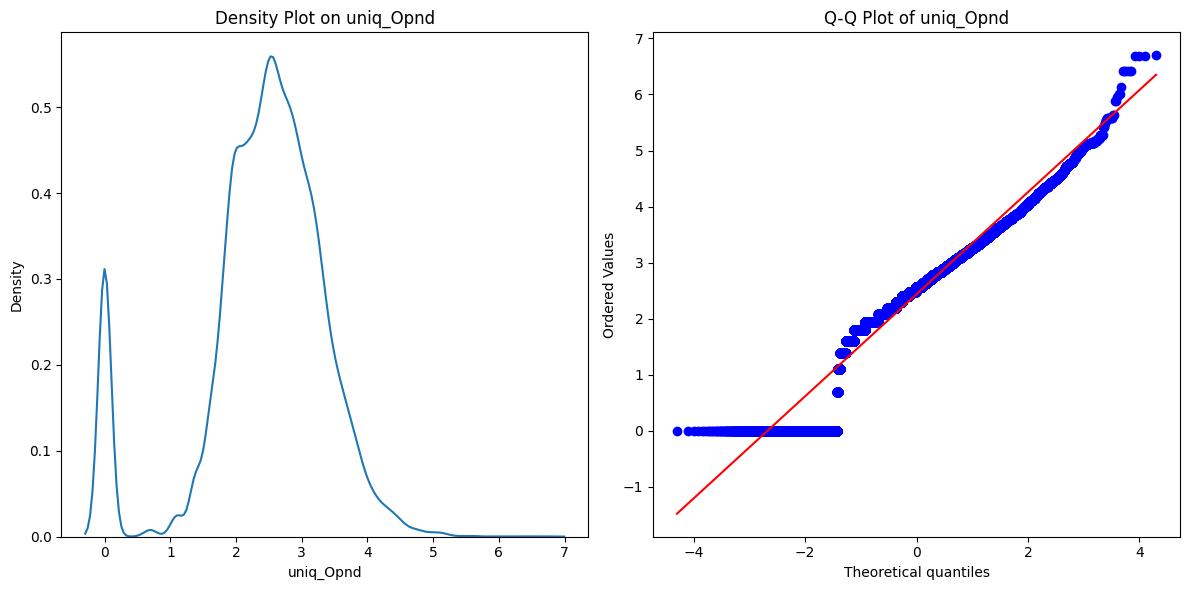

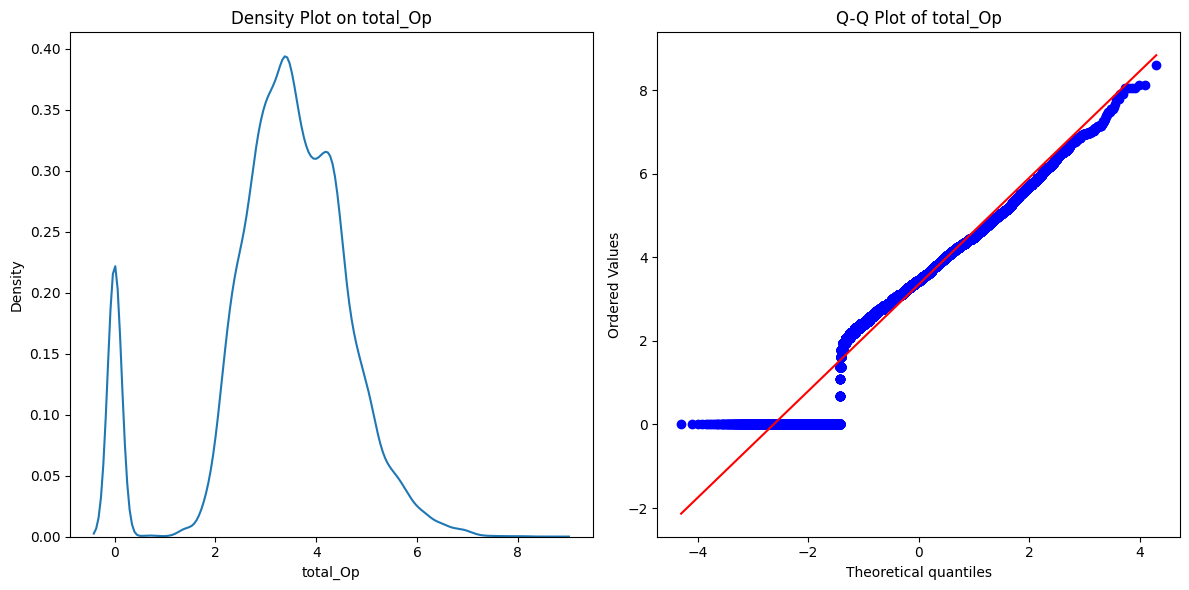

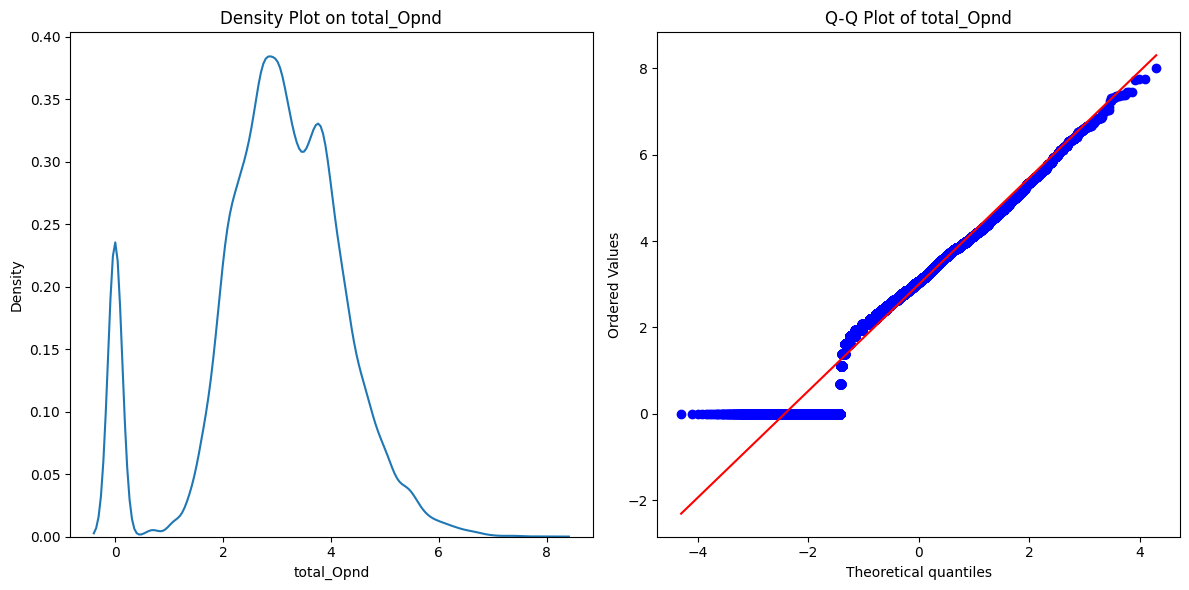

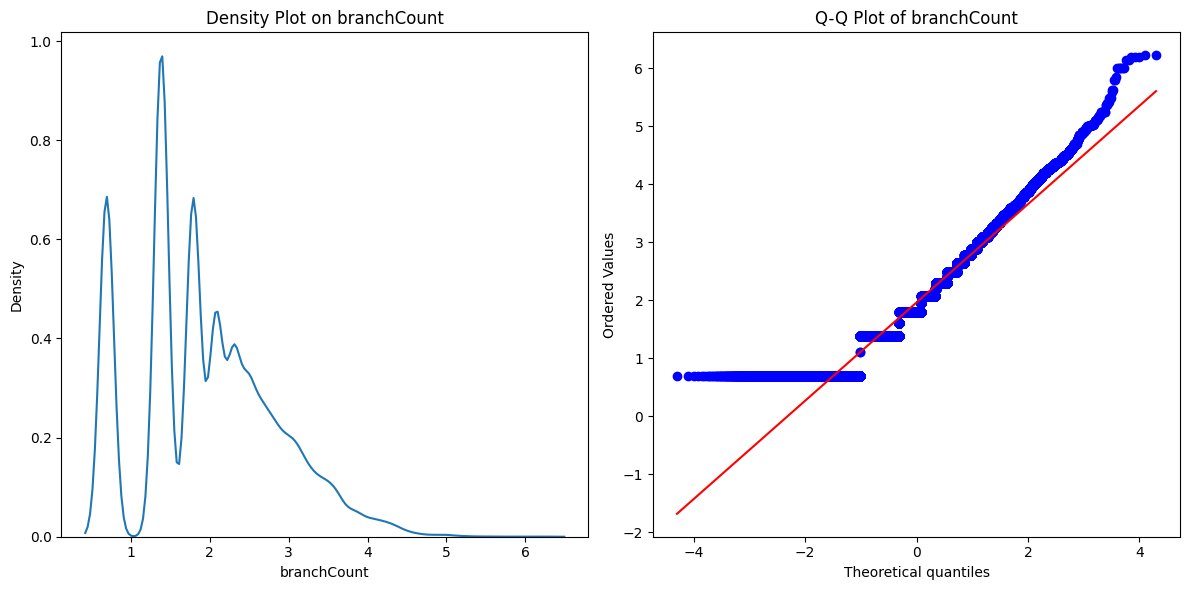

In [19]:
for column in X_train.columns :
    
    CheckSkewness(X_train, column)

In [20]:
# Now data is skew 

from sklearn.metrics import roc_auc_score


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
def TrainModel () :

    lgb_dict = {
        "learning_rate" : 0.2,
        "n_estimators" : 200,
        "boosting_type" : 'dart',
        "reg_alpha" : 0.4,
    }

    xgb_dict = {
        "n_estimators" : 200,
        "learning_rate" : 0.2,
        "eval_metric" : 'auc',
        "objective" : "binary:logistic"
    }

    cat_dict = {
        "n_estimators" : 200,
        "learning_rate" : 0.2
    }

    model_dict = {
        "log" : LogisticRegression(max_iter=1000),
        "lgb" : LGBMClassifier(random_state=42, **lgb_dict),
        "cat" : CatBoostClassifier(random_state=42, verbose=False, **cat_dict),
        "xgb" : XGBClassifier(random_state=42, **xgb_dict),
    }

    model_score = []

    for model_name, model in model_dict.items() :
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        roc_auc = roc_auc_score(y_test, pred)
        print(f"ROC AUC Score of model {model_name}:", roc_auc)
        model_score.append(roc_auc)


TrainModel()

ROC AUC Score of model log: 0.645374290355534
[LightGBM] [Info] Number of positive: 18536, number of negative: 62874
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3559
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.227687 -> initscore=-1.221418
[LightGBM] [Info] Start training from score -1.221418
ROC AUC Score of model lgb: 0.6627175126577687
ROC AUC Score of model cat: 0.6600513777011149
ROC AUC Score of model xgb: 0.6624491107464037


In [23]:
from sklearn.metrics import roc_curve, auc


def KNNModel (X_test, X_train, y_train, y_test) :
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    knn = KNeighborsClassifier(n_neighbors=200)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"ROC AUC Score of model :", roc_auc)


KNNModel(X_test, X_train,y_train,  y_test)


ROC AUC Score of model : 0.6582386442929792


In [24]:
test_data = pd.read_csv('data/test.csv')
test_data.shape

(67842, 22)

In [25]:
data = trf2.fit_transform(inputs)
test_data = trf2.transform(test_data)
model = LGBMClassifier(random_state=42)
model.fit(data, targets)
test_data.shape

[LightGBM] [Info] Number of positive: 23064, number of negative: 78699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3585
[LightGBM] [Info] Number of data points in the train set: 101763, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226644 -> initscore=-1.227357
[LightGBM] [Info] Start training from score -1.227357


(67842, 21)

In [26]:
y_pred = model.predict_proba(test_data)[:,1]

In [27]:
len(y_pred)

67842

In [28]:
predictions = pd.DataFrame()
len(test_data.index)

67842

In [29]:
predictions = pd.read_csv('data/sample_submission.csv')

In [30]:
predictions['defects'] = y_pred
predictions.shape

(67842, 2)

In [31]:
predictions.to_csv('prediction.csv', index=False)

In [32]:
predictions.shape

(67842, 2)